# Polynomial Regression

We can use a linear model to fit nonlinear data, if our data is more complex than a straight line. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called "Polynomial Regression"

Let's look at an example. First, let's generate some nonlinear data, based on a simple "quadratic equation", plus some noise

In [73]:
import numpy as np
import matplotlib.pyplot as plt
m =100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

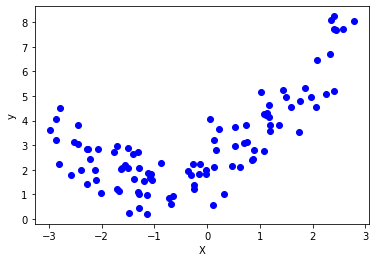

In [74]:
plt.plot(X,y,'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Clearly, a traight line will never fit this data properly. So let's use Scikit-Learn's PolynomialFeatures class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [76]:
X[0]

array([-0.24584131])

In [77]:
X_poly[0]

array([-0.24584131,  0.06043795])

X_poly now contains the original feature of X plus the square of this feature. Now, we can fit a LinearRegression model to this extended training data

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [79]:
lin_reg.intercept_

array([2.0392224])

In [80]:
lin_reg.coef_

array([[0.9120376 , 0.47555185]])

We have function:

In [ ]:
y^ = 0.48x^2 + 0.91x + 2.04

When there are multiple features, Polynomial Regression is capable of finding relationships between features. This is made posible by the fact that PolynominalFeatures also adds all combinations of features up to the given degree. For example, if there were 2 features a and b, PolynomialFeatures with degree=3 would add a^2, a^3, b^2, b^3 and ab, (a^2)b, a(b^2)

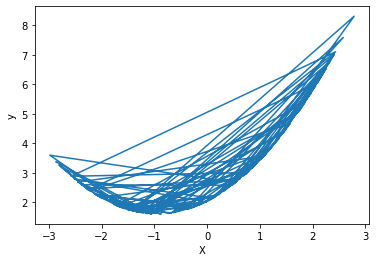

In [87]:
y_hat = [0.48*x**2 + 0.91*x + 2.04 for x in X]
plt.plot(X, y_hat)
plt.xlabel('X')
plt.ylabel('y')
plt.show()